In [72]:
# import of libraries
import pandas as pd
import glob
import numpy as np
import math

from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter as FF
from matplotlib.ticker import StrMethodFormatter as SMF
import seaborn as sns

from sklearn.model_selection import cross_val_predict as CVP
from sklearn.model_selection import KFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error as MSErr
from sklearn.metrics import mean_absolute_error as MAErr
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler as SS

---
# Supervised Machine Learning (Regression) Analysis on Medical Cost Data

The main objective of this analysis is to perform exploratory data analysis on medical data, as well as to find an appropriate regression model to use to find relationships between data attributes. The dataset used in this notebook is available at: https://www.kaggle.com/mirichoi0218/insurance?ref=hackernoon.com

The data contains the following columns:

*   age: age of primary beneficiary
*   sex: insurance contractor gender, female, male
*   bmi: Body mass index, providing an understanding of body, weights
that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   children: Number of children covered by health insurance / Number of dependents
*   smoker: Smoking
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   charges: Individual medical costs billed by health insurance

This dataset allows for two items, interpretation of trends associated to the attributes presented, and prediction by finding relationships between attributes. Let’s get started by importing our dataset below:


In [73]:
# Put the dataset into dataframe form
data = pd.read_csv('/content/insurance.csv')

# Get first 5 rows of the dataset
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
#Print all of the object data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

sex : ['female' 'male']
male      676
female    662
Name: sex, dtype: int64
_________________________________________________________________
smoker : ['yes' 'no']
no     1064
yes     274
Name: smoker, dtype: int64
_________________________________________________________________
region : ['southwest' 'southeast' 'northwest' 'northeast']
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
_________________________________________________________________


In [76]:
#check if we have any missing attributes in any rows.
#True = rows with missing attributes.
#False = everything is populated.
data.isnull().values.any()

False

In [77]:
#Description of out dataset with int/float types
data.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


As we can see from the import process, we have 3 object types which will need to be one-hot encoded, as well as having no missing values which would need substitution/removal. From the above piece of code, we can already see relationships developing with charges, age & BMI. It's apparent the data is already clean to work with and we can explore the data a little bit.

---
# Data exploration

To explore our data, lets look at the correlations of our columbs with one another. This has been done by plotting a heat map, though, this only plots correlations between attributes and doesnt give visual insight into data relationships.

I have accopained the heatmap of correlation with a pairplot to visually show relationships between attributes, as well as to visualise distribution of values for each attribute plotted

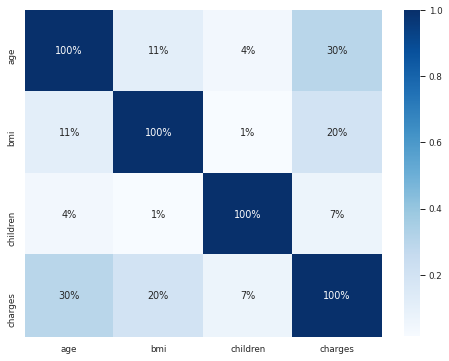

In [78]:
data_corr = data.corr()
data_corr
plt.figure(figsize=(8,6))
sns.set_context('paper')

sns.heatmap(data_corr, annot=True, cmap='Blues', fmt='.0%')

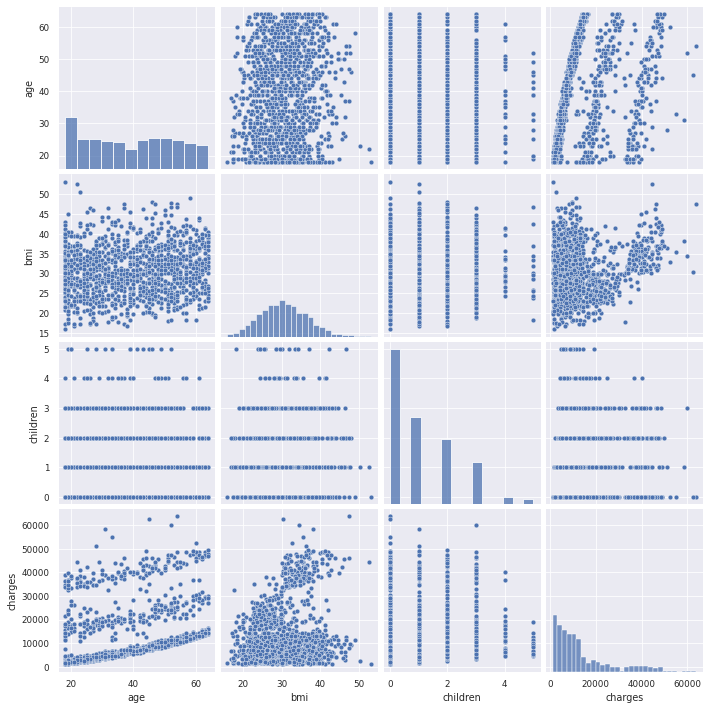

In [79]:
#broad look at data distribution
sns.pairplot(data)

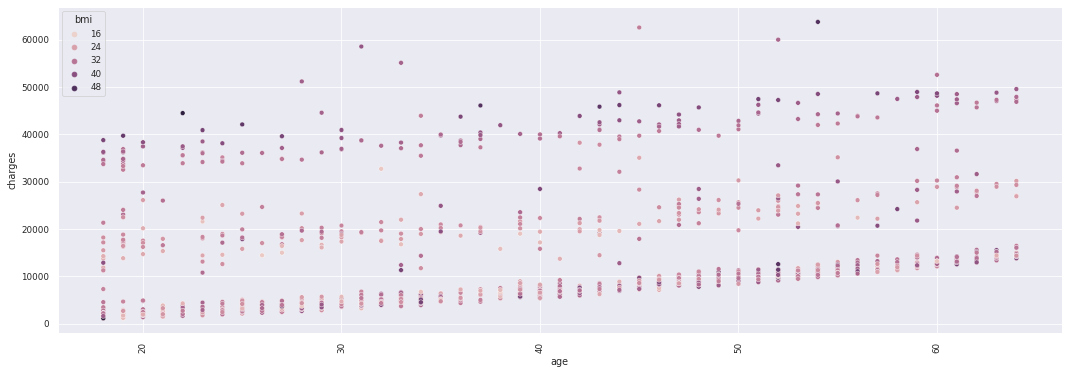

In [80]:
#scatter plot of members DOB
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
plt.xticks(rotation=90)
sns.scatterplot(x='age', y='charges', hue='bmi', data=data, ax = ax)

The above plot shows the charges associated with age, with each dot representing the bmi of the individual (the darker the plot, the higher the BMI). We can already see that as age increases the charges aslo increase, though, with individuals with a higher BMI, charges also go up, greater than with those with a lower BMI.

With the below plot, we can see the distribuiton of BMI and distribution of age amongst the dataset.

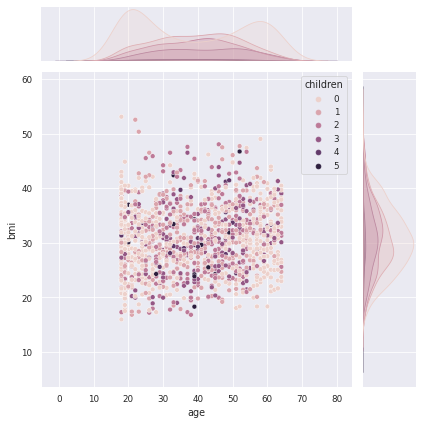

In [81]:
#age against bmi and number of children
sns.jointplot(x='age', y='bmi', hue='children', data=data, ax = ax)

The below plot shows two charts, both showing the charges against age, but split between male and female. It appears to be apparant that gender does not play a role in regard to more/less charges (this would show with a higher positione line), but we can see there are more males which smoke than females.

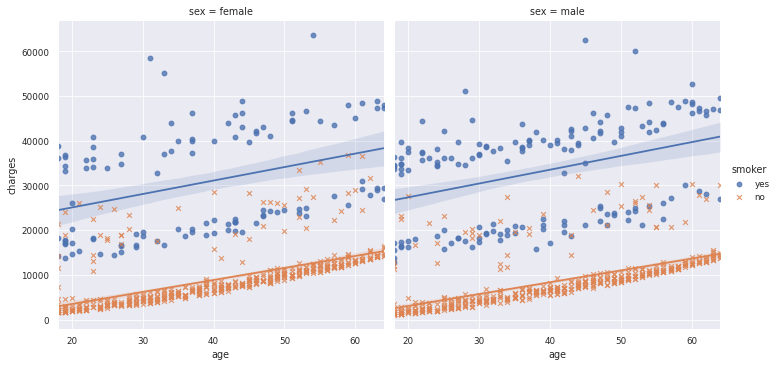

In [82]:
# charges against age
sns.lmplot(x="age", y="charges", hue="smoker", col="sex", markers=["o", "x"], data=data)

Likewise with charges against BMI, there does not appear to be much difference between genders, but we can see a relationship between smokers and non smokers. Where smokers have a increased slope to heir bmi as opposed to non-smokers. Thus, smokers will incur steaper charges.

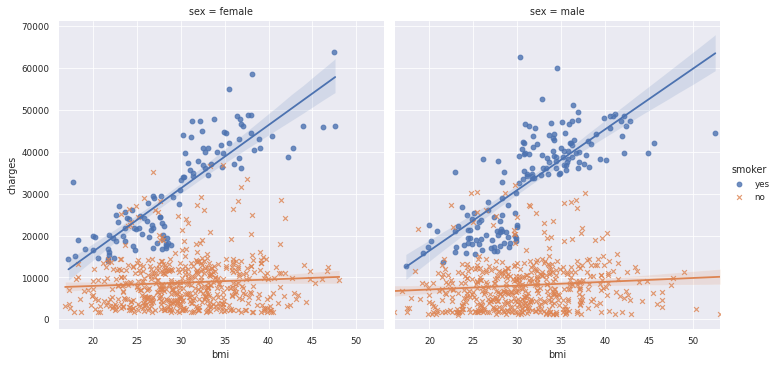

In [83]:
# bmi against genders
sns.lmplot(x="bmi", y="charges", hue="smoker", col="sex", markers=["o", "x"], data=data)

---
# One-Hot Encoding, Skew-Check and Train/Test Split

Let’s take our object type columbs and one-Hot Encode them. The below code takes the dataframe and stores the object columns into a new varaible "one_hot_encode_cols". This is the variable we will perform the one-hot encoding for. We can see we have changed our dataframe by increasing the columbs from 7 to 9.


In [84]:
#Code from class notebook. One Hot Encoding method
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

df_final = pd.get_dummies(data, columns = one_hot_encode_cols, drop_first=True)
df_final.shape

(1338, 9)

In [85]:
#Code from class notebook, check for skewed distrubutions
float_cols = df_final.columns[df_final.dtypes == np.float]

skew_limit = 0.75
skew_vals = df_final[float_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending = False)
             .to_frame()
             .rename(columns = {0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
charges,1.51588


We check for skewed distrubiton, and as we can see, the charges column is weighted in the left tail of the distribuion. Because charges can vary and due to the lack of context to the charges, I do not feel that there is a requirement of adjustment as of now. Though, this may need to be noted as later results could be affected by this decision.

Let's go ahead and create our train test split and continue to modeling.

In [86]:
#drop columbs before train test split.
#train test split

X = df_final.reset_index()
y = df_final.index

X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.3, random_state = 13131)

---
# Modeling
Let's begin our linear regression, all variables will be used as predictors.



In [87]:
# linear regression
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

reg_1 = LR().fit(X_train_1, y_train)
y_pred = reg_1.predict(X_test_1)

For my chosen predictors, I have chosen to include:

*   age
*   bmi
*   smoker_yes
*   region_northwest
*   region_southeast
*   region_southwest
*   charges

I think these will give a good snapshot and I am curious to see if they show up as final predictors, as well as how the overall manual model compares with the calculated models.

In [88]:
#Numerical predictors.
columbs = ['age', 'bmi', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest','charges']

#Neighborhoods has been one hot encoded.
others = [v for v in df_final.columns.to_list() if v.startswith('others')] 

X_train_2 = X_train[columbs + others]
X_test_2 = X_test[columbs + others]

reg_2 = LR().fit(X_train_2, y_train)

Below we shall setup our regularized regression:

In [89]:
# K Fold
kf = KFold(shuffle = True, random_state = 13131, n_splits = 3)

In [90]:
#optimization funciton
#Retrieve R2 scores for different alpha for LASSO or Ridge.
def optimize_alpha(alphas, x, y, model, kf):
    
    #Scale and transform x.
    s = SS()
    x = s.fit_transform(x)
    
    #List of R2.
    r2_scores = []
    
    for alpha in alphas:
        
        reg = model(alpha = alpha, max_iter = 500000)
        y_pred = CVP(reg, x, y, cv = kf)
        score = r2_score(y, y_pred)
        r2_scores.append(score)
    
    return(r2_scores)


In [91]:
# graph helper
def alpha_r2_graph(alphas, R2s, xlabels, model):
    
    df = pd.DataFrame(data = {'alpha': alphas,
                              'R2': R2s})
    sns.set()

    #Scatter Plot.
    sns.lineplot(data = df,
                 x = 'alpha',
                 y = 'R2',
                 marker = 'o')
    
    #Size.
    plt.gcf().set_size_inches(15, 6.92)
    paper_rc = {'lines.linewidth': 2, 'lines.markersize': 6}  
    
    #Axes.
    ax = plt.gca()
    
    #Title setup.
    ax.set_title("Optimizing Hyperparameter for {} Regression".format(model), fontsize = 24)

    #X-axis setup.
    ax.set_xlabel("α", fontsize = 22)
    ax.set_xscale('log')
    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, rotation = 45, ha = 'right')
    if (model == 'Ridge') :
        ax.get_xaxis().set_major_formatter(FF(lambda x, p: format(int(x), ',')))

    #Y-axis setup.
    ax.set_ylabel("R2", fontsize = 22)
    ylabels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_xticks(xlabels)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

---
# LASSO
All variables will be used as predictors with an L1 regularization.



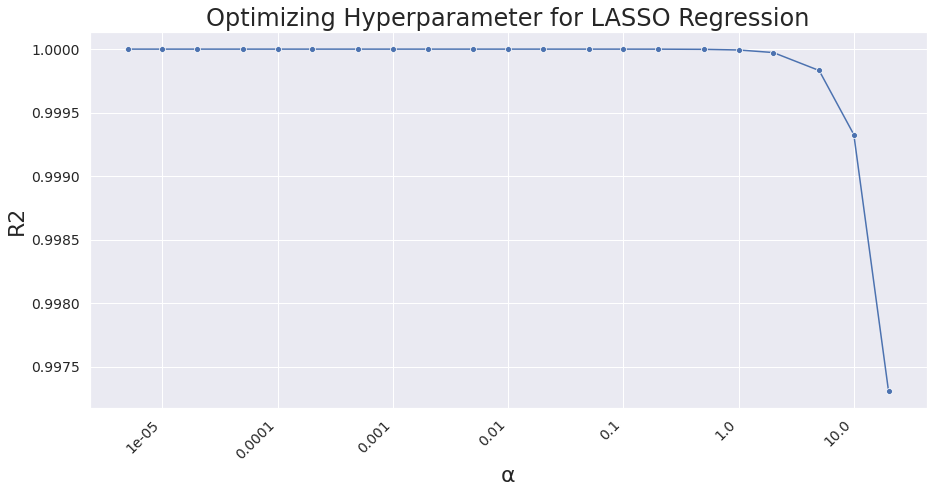

In [92]:
alphas = list(pd.core.common.flatten([[a / 2, a, 2 * a] for a in np.geomspace(1e-5, 1e1, 7)]))
xlabels = [a for a in np.geomspace(1e-5, 1e1, 7)]

s = SS()
X_train_3 = s.fit_transform(X_train)

#Determine R2s and graph.
r2s_l = optimize_alpha(alphas, X_train_3, y_train, Lasso, kf)
alpha_r2_graph(alphas, r2s_l, xlabels, 'LASSO')

Looking at the above chart, the drop off in alpha begins after the 1.0 mark, this would indicate that α=1.0 is optimal.

In [93]:
X_test_3 = s.transform(X_test)

reg_3 = Lasso(alpha = 1.0).fit(X_train_3, y_train)

---
# Ridge
All variables will be used as predictors with an  L2  regularization.

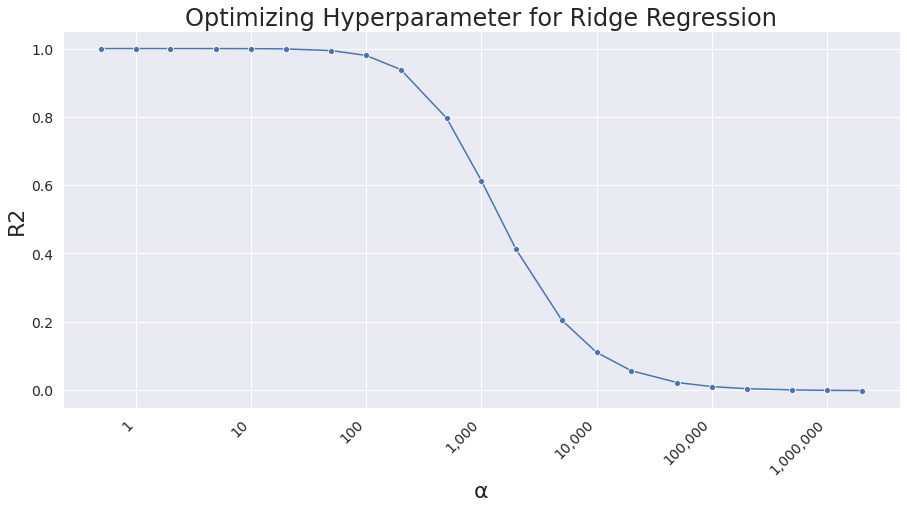

In [94]:
alphas = list(pd.core.common.flatten([[a / 2, a, 2 * a] for a in np.geomspace(1, 1e6, 7)]))
xlabels = [a for a in np.geomspace(1, 1e6, 7)]

s = SS()
X_train_4 = s.fit_transform(X_train)

#Determine R2s and graph.
r2s_r = optimize_alpha(alphas, X_train_4, y_train, Ridge, kf)
alpha_r2_graph(alphas, r2s_r, xlabels, 'Ridge')

Looking at the above chart, the drop off in alpha begins rouglhy after 90/100 mark, this would indicate that α=85.0 is optimal.

In [95]:
X_test_4 = s.transform(X_test)

reg_4 = Ridge(alpha = 85.0).fit(X_train_4, y_train)

---
# Evaluation & Selection


In [96]:
# helper function
#Inputs regression models, predictors, and y-values, outputs DataFrame of R2, Adjusted R2, RMSE, and MAE.
def summary_df(models, Xs, Y) :

    index = ['All Variables', 'My Variables', 'LASSO', 'Ridge']
    R2 = []
    ADJ_R2 = []
    RMSE = []
    MAE = []

    for i in range(4):
        y_pred = models[i].predict(Xs[i])
        
        #R2.
        r2 = r2_score(Y, y_pred)
        R2.append(r2)
        
        #Adj R2.
        adj_r2 = 1.0 - (1.0 - r2) * (len(Y) - 1.0) / (len(Y) - Xs[i].shape[1] - 1.0)
        ADJ_R2.append(adj_r2)
        
        #RMSE.
        rmse = math.sqrt(MSErr(Y, y_pred))
        RMSE.append(rmse)
                         
        #MAE.
        mae = MAErr(Y, y_pred)
        MAE.append(mae)

    df = pd.DataFrame(data = {'R2': R2,
                              'Adjusted R2': ADJ_R2,
                              'RMSE': RMSE,
                              'MAE': MAE},
                      index = index)
    return(df)

In [97]:
# train model
models = [reg_1, reg_2, reg_3, reg_4]
X_trains = [X_train_1, X_train_2, X_train_3, X_train_4]

summary_df(models, X_trains, y_train)

,R2,Adjusted R2,RMSE,MAE
All Variables,1.000000,1.000000,2.397015e-13,1.848243e-13
My Variables,0.003877,-0.003636,3.857706e+02,3.336900e+02
LASSO,0.999993,0.999993,1.000000e+00,8.654986e-01
Ridge,0.993050,0.992975,3.222321e+01,2.786610e+01


In [98]:
# test date
X_tests = [X_test_1, X_test_2, X_test_3, X_test_4]

summary_df(models, X_tests, y_test)

,R2,Adjusted R2,RMSE,MAE
All Variables,1.000000,1.000000,2.367547e-13,1.866141e-13
My Variables,-0.009420,-0.027354,3.872852e+02,3.348606e+02
LASSO,0.999993,0.999993,9.977942e-01,8.652998e-01
Ridge,0.992965,0.992785,3.233201e+01,2.795605e+01


Looking at the above summary, it is apparent using my varaibles and Rdige give a high error rate as opposed to LASSO or All Variable.

This would then suggest that using LASSO would be the appropriate model, however, given that the use of All Variables has a solid r^2 score and a very low error rate, compared to the other two, and the variables used as predictors are easily explainable. 

All Variables concisely sums up 100% of the variance of the house prices in real world terms. The regularization models cannot do that.


---
# Summary

For this assignment, I have explored medical data through supervised machine learning and regression technqiues. It is apparent that using all vaiables seems to porducice explainable results with no error.

I feel that possible regularizing and distributing the data in a standard fashion could help produce more desirable results but may impact bias.

I did not use any polynomial features, which could possibly improve the model.

It is important to note that this dataset does contain a limitng number of columns, even with one-hot encoding, the number of columns is still small. Having a dataset with more attributes per an observation would open up oppertunities for complexity.
